KMeans - Silhouette Score: 0.33094855082933283
KMeans - Davies-Bouldin Index: 0.9488111545415386
Agglomerative - Silhouette Score: 0.24341484245098172
Agglomerative - Davies-Bouldin Index: 1.2784068689411048
GMM - Silhouette Score: 0.19632155930168324
GMM - Davies-Bouldin Index: 1.1334026656770466


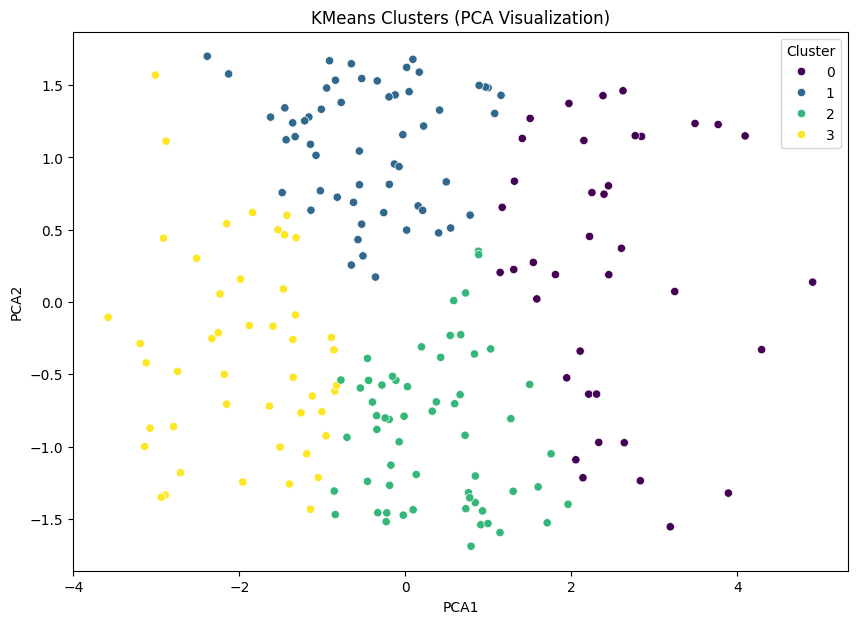

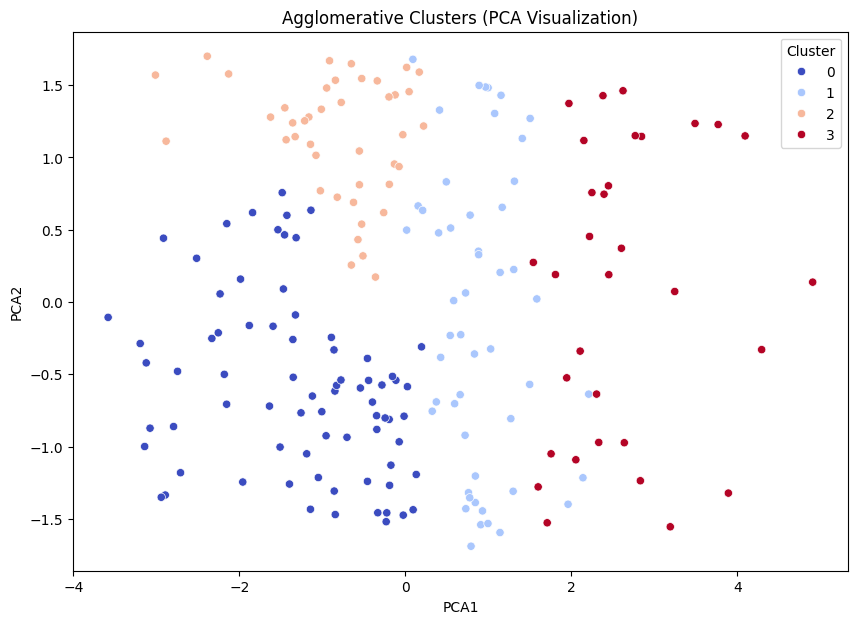

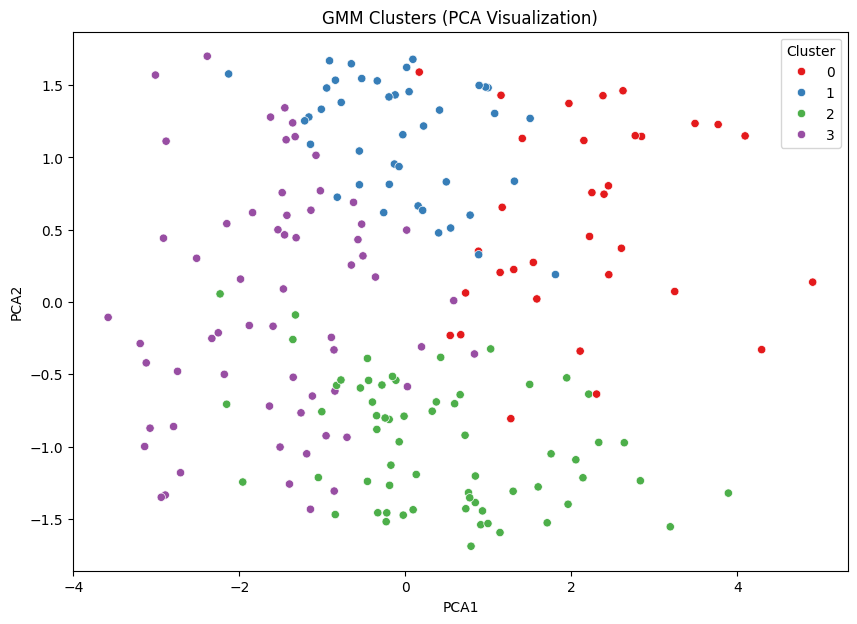

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Data Preprocessing
# Aggregate transactional data
customer_transactions = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "TransactionID": "count"
}).rename(columns={
    "TotalValue": "TotalSpent",
    "Quantity": "TotalQuantity",
    "TransactionID": "TransactionCount"
}).reset_index()

# Merge customer profile with transactional data
customer_data = pd.merge(customers, customer_transactions, on="CustomerID", how="left")

# Handle missing values (if any)
customer_data.fillna(0, inplace=True)

# Feature Engineering
# Convert SignupDate to datetime and calculate the customer tenure
df = customer_data.copy()
df["SignupDate"] = pd.to_datetime(df["SignupDate"])
df["DaysSinceSignup"] = (pd.Timestamp.now() - df["SignupDate"]).dt.days

# Select features for clustering
features = ["TotalSpent", "TotalQuantity", "TransactionCount", "DaysSinceSignup"]
X = df[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering using KMeans
optimal_clusters = 4  # Set based on prior analysis or Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Evaluate the clustering using KMeans
kmeans_dbi = davies_bouldin_score(X_scaled, kmeans_clusters)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_clusters)
print(f"KMeans - Silhouette Score: {kmeans_silhouette}")
print(f"KMeans - Davies-Bouldin Index: {kmeans_dbi}")

# Perform clustering using Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Evaluate the clustering using Agglomerative Clustering
agg_dbi = davies_bouldin_score(X_scaled, agg_clusters)
agg_silhouette = silhouette_score(X_scaled, agg_clusters)
print(f"Agglomerative - Silhouette Score: {agg_silhouette}")
print(f"Agglomerative - Davies-Bouldin Index: {agg_dbi}")

# Perform clustering using Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# Evaluate the clustering using GMM
gmm_dbi = davies_bouldin_score(X_scaled, gmm_clusters)
gmm_silhouette = silhouette_score(X_scaled, gmm_clusters)
print(f"GMM - Silhouette Score: {gmm_silhouette}")
print(f"GMM - Davies-Bouldin Index: {gmm_dbi}")

# Add cluster labels to the dataframe
df["KMeans_Cluster"] = kmeans_clusters
df["Agglomerative_Cluster"] = agg_clusters
df["GMM_Cluster"] = gmm_clusters

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="KMeans_Cluster", palette="viridis", legend="full")
plt.title("KMeans Clusters (PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Agglomerative_Cluster", palette="coolwarm", legend="full")
plt.title("Agglomerative Clusters (PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="GMM_Cluster", palette="Set1", legend="full")
plt.title("GMM Clusters (PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()
